<a href="https://colab.research.google.com/github/arivle/ML_Multiple-Linear-Regression-/blob/master/Linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nilai a adalah 30056.7108
Nilai b adalah 0.3258


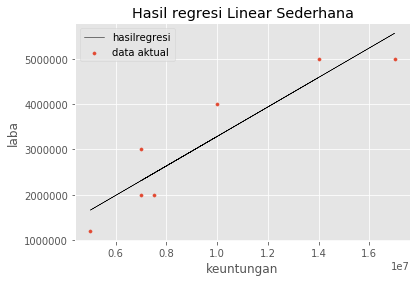

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

#containing dummy data 
keuntungan = [7000000, 10000000, 7500000, 5000000, 17000000, 7000000, 14000000]
laba = [3000000, 4000000, 2000000, 1200000, 5000000, 2000000, 5000000]

#function for generate linear function
def linearRegresion(data):
  '''
  indeks[0] -> response variable -> x
  indeks[1] -> predictor variable -> y
  '''
  x2=[]
  y2=[]
  xy=[]
  n = len(data[0])
  for x in data[0]:
    x2.append(x**2)
  
  for y in data[0]:
    y2.append(y**2)
  i=0;
  
  while(i<n):
    dump = data[0][i]*data[1][i]
    xy.append(dump)
    i+=1
    
  jmlhx = sum(data[0])
  jmlhy = sum(data[1])
  jmlhx2 = sum(x2)
  jmlhy2 = sum(y2)
  jmlhxy = sum(xy)
  a = ((jmlhy*jmlhx2)-(jmlhx*jmlhxy))/(n*jmlhx2-(jmlhx**2))
  b = ((n*jmlhxy)-(jmlhx*jmlhy))/(n*jmlhx2-(jmlhx**2))
  return(a,b)

#visualize
def gambarGrafik(dataProses):
  a,b = linearRegresion(dataProses)
  print("Nilai a adalah %.4f"%(a))
  print("Nilai b adalah %.4f"%(b))

  def f1(keanggotaan,a,b):
    hit = []
    for x in keanggotaan:
      y = b*x+a
      hit.append(y)
    return(hit)
  plt.scatter(dataProses[0],dataProses[1],label='data aktual',s=10)
  plt.plot(dataProses[0],f1(dataProses[0],a,b),c='k',label='hasilregresi',linewidth=0.5)
  plt.title("Hasil regresi Linear Sederhana")
  plt.ylabel("laba")
  plt.xlabel("keuntungan")
  plt.legend()
  fig = plt.figure(1)
  plt.show()
  
#draw the graphic for advantage in bussiness
gambarGrafik([keuntungan,laba])


In [24]:
pip install --upgrade --no-deps statsmodels

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.10.1)


[[ 7000000  3000000   100000]
 [10000000  4000000   200000]
 [ 7500000  2000000   300000]
 [ 5000000  1200000   400000]
 [17000000  5000000   500000]
 [ 7000000  2000000   600000]
 [14000000  5000000   700000]] 

[ 7000000 10000000  7500000  5000000 17000000  7000000 14000000]


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


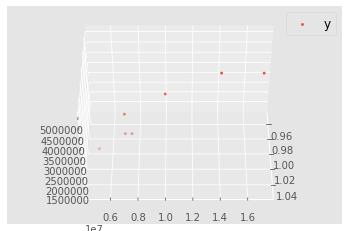

In [30]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sma
import statsmodels.formula.api as sm
import matplotlib as mpl

data = {'keuntungan' : [7000000, 10000000, 7500000, 5000000, 17000000, 7000000, 14000000],
           'jual' : [3000000, 4000000, 2000000, 1200000, 5000000, 2000000, 5000000],
           'bahanbaku':[100000, 200000, 300000, 400000, 500000, 600000, 700000]}
dataset = pd.DataFrame(data)
X = dataset.iloc[:, :].values

print(X,"\n") #untuk menampilkan variabel x, yaitu keuntungan dan bahan baku

y = dataset.iloc[:, 0].values #untuk menampilkan variabel y : keuntungan
print(y)

"""
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [2])
X = onehotencoder.fit_transform(X).toarray()

"""
# Menghindari jebakan dummy variabel
#X = X[:, 1:]
 
# Membagi data menjadi the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 
# Membuat model Multiple Linear Regression dari Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Memprediksi hasil Test set
y_pred = regressor.predict(X_test)
 
# Memilih model multiple regresi yang paling baik dengan metode backward propagation

X = sma.add_constant(X)
X_opt = X[:, [0, 1, 2]]
regressor_OLS = sma.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1]]
regressor_OLS = sma.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 2]]
regressor_OLS = sma.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [1,2]]
regressor_OLS = sma.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

mpl.rcParams['legend.fontsize'] = 12
  
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(X[:,0], X[:,1], X[:,2], label ='y', s = 5) 
ax.legend() 
ax.view_init(45, 0) 
  
plt.show() 